In [1]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
df = pd.read_csv(r'C:\Users\admin\Desktop\exp1\winequality-red.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [2]:
y = df.pop('quality')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [3]:
df_mean = df.mean()
df_std = df.std()
Z = (df - df_mean) / df_std

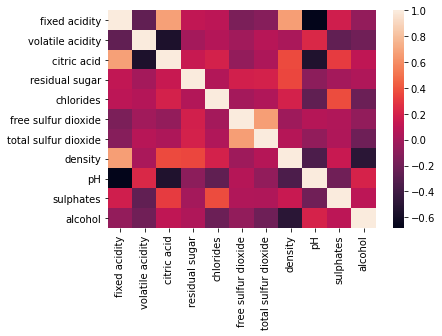

In [4]:
c = Z.cov()

import matplotlib.pyplot as plt
import seaborn as sns
sns.heatmap(c)
plt.show()

In [5]:
eigenvalues, eigenvectors = np.linalg.eig(c)
print('Eigen values:\n', eigenvalues)
print('Eigen values Shape:', eigenvalues.shape)
print('Eigen Vector Shape:', eigenvectors.shape)

Eigen values:
 [3.09913244 1.92590969 1.55054349 1.21323253 0.95929207 0.05955831
 0.18133317 0.34464212 0.4229567  0.58379122 0.65960826]
Eigen values Shape: (11,)
Eigen Vector Shape: (11, 11)


In [6]:
idx = eigenvalues.argsort()[::-1]

eigenvalues = eigenvalues[idx]

eigenvectors = eigenvectors[:,idx]
print(eigenvectors)

[[ 0.48931422 -0.11050274 -0.12330157 -0.22961737 -0.08261366  0.10147858
  -0.35022736 -0.17759545  0.19402091 -0.24952314 -0.63969145]
 [-0.23858436  0.27493048 -0.44996253  0.07895978  0.21873452  0.41144893
  -0.5337351  -0.07877531 -0.1291103   0.36592473 -0.0023886 ]
 [ 0.46363166 -0.15179136  0.23824707 -0.07941826 -0.05857268  0.06959338
   0.10549701 -0.37751558 -0.38144967  0.62167708  0.0709103 ]
 [ 0.14610715  0.27208024  0.10128338 -0.37279256  0.73214429  0.04915555
   0.29066341  0.29984469  0.00752295  0.09287208 -0.18402996]
 [ 0.21224658  0.14805156 -0.09261383  0.66619476  0.2465009   0.30433857
   0.37041337 -0.35700936  0.11133867 -0.21767112 -0.05306532]
 [-0.03615752  0.51356681  0.42879287 -0.04353782 -0.15915198 -0.01400021
  -0.11659611 -0.2047805   0.63540522  0.24848326  0.05142086]
 [ 0.02357485  0.56948696  0.3224145  -0.03457712 -0.22246456  0.13630755
  -0.09366237  0.01903597 -0.59211589 -0.37075027 -0.0687016 ]
 [ 0.39535301  0.23357549 -0.33887135 -0.

In [7]:
explained_var = np.cumsum(eigenvalues) / np.sum(eigenvalues)
explained_var

array([0.28173931, 0.45682201, 0.59778051, 0.70807438, 0.79528275,
       0.85524714, 0.90831906, 0.94676967, 0.97810077, 0.99458561,
       1.        ])

In [11]:
n_components = np.argmax(explained_var >= 0.50) 
n_components

2

In [12]:
feature_names = list(df)
print(feature_names)

['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']


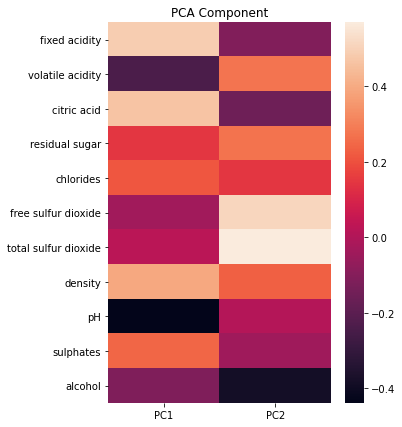

In [13]:
u = eigenvectors[:,:n_components]
pca_component = pd.DataFrame(u, index = list(df), columns = ['PC1','PC2'])

# plotting heatmap
plt.figure(figsize =(5, 7))
sns.heatmap(pca_component)
plt.title('PCA Component')
plt.show()


In [14]:
Z_pca = Z @ pca_component
Z_pca.rename({'PC1': 'PCA1', 'PC2': 'PCA2'}, axis=1, inplace=True)
# Print the Pricipal Component values
print(Z_pca)

          PCA1      PCA2
0    -1.619023  0.450809
1    -0.798920  1.855972
2    -0.748245  0.881763
3     2.356935 -0.269892
4    -1.619023  0.450809
...        ...       ...
1594 -2.149828  0.814031
1595 -2.213804  0.892822
1596 -1.455674  0.311648
1597 -2.269808  0.979485
1598 -0.426841 -0.536522

[1599 rows x 2 columns]
